In [1]:
## WASTE MANAGEMENT USING CNN

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install tensorflow

In [4]:
#pip install pandas

In [5]:
#pip install matplotlib

In [6]:
#pip install tqdm

In [7]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [9]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
import cv2
import pandas as pd
import os
import glob
from tqdm import tqdm
train_path = "DATASET/TRAIN"
x_data = []
y_data = []
for category in glob.glob(train_path + '/*'):
    label = os.path.basename(category)  
    for file in tqdm(glob.glob(category + '/*')):
        img_array = cv2.imread(file) 
        if img_array is not None:  
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  
            x_data.append(img_array)
            y_data.append(label)
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:10<00:00, 934.24it/s] 


In [11]:
data.shape

(22564, 2)

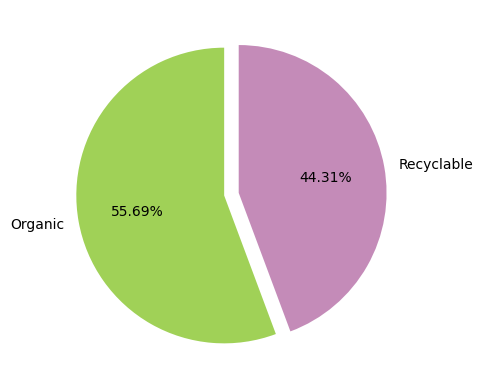

In [12]:

colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%0.2f%%', 
        colors = colors, startangle=90, explode=[0.05,0.05])
plt.show()

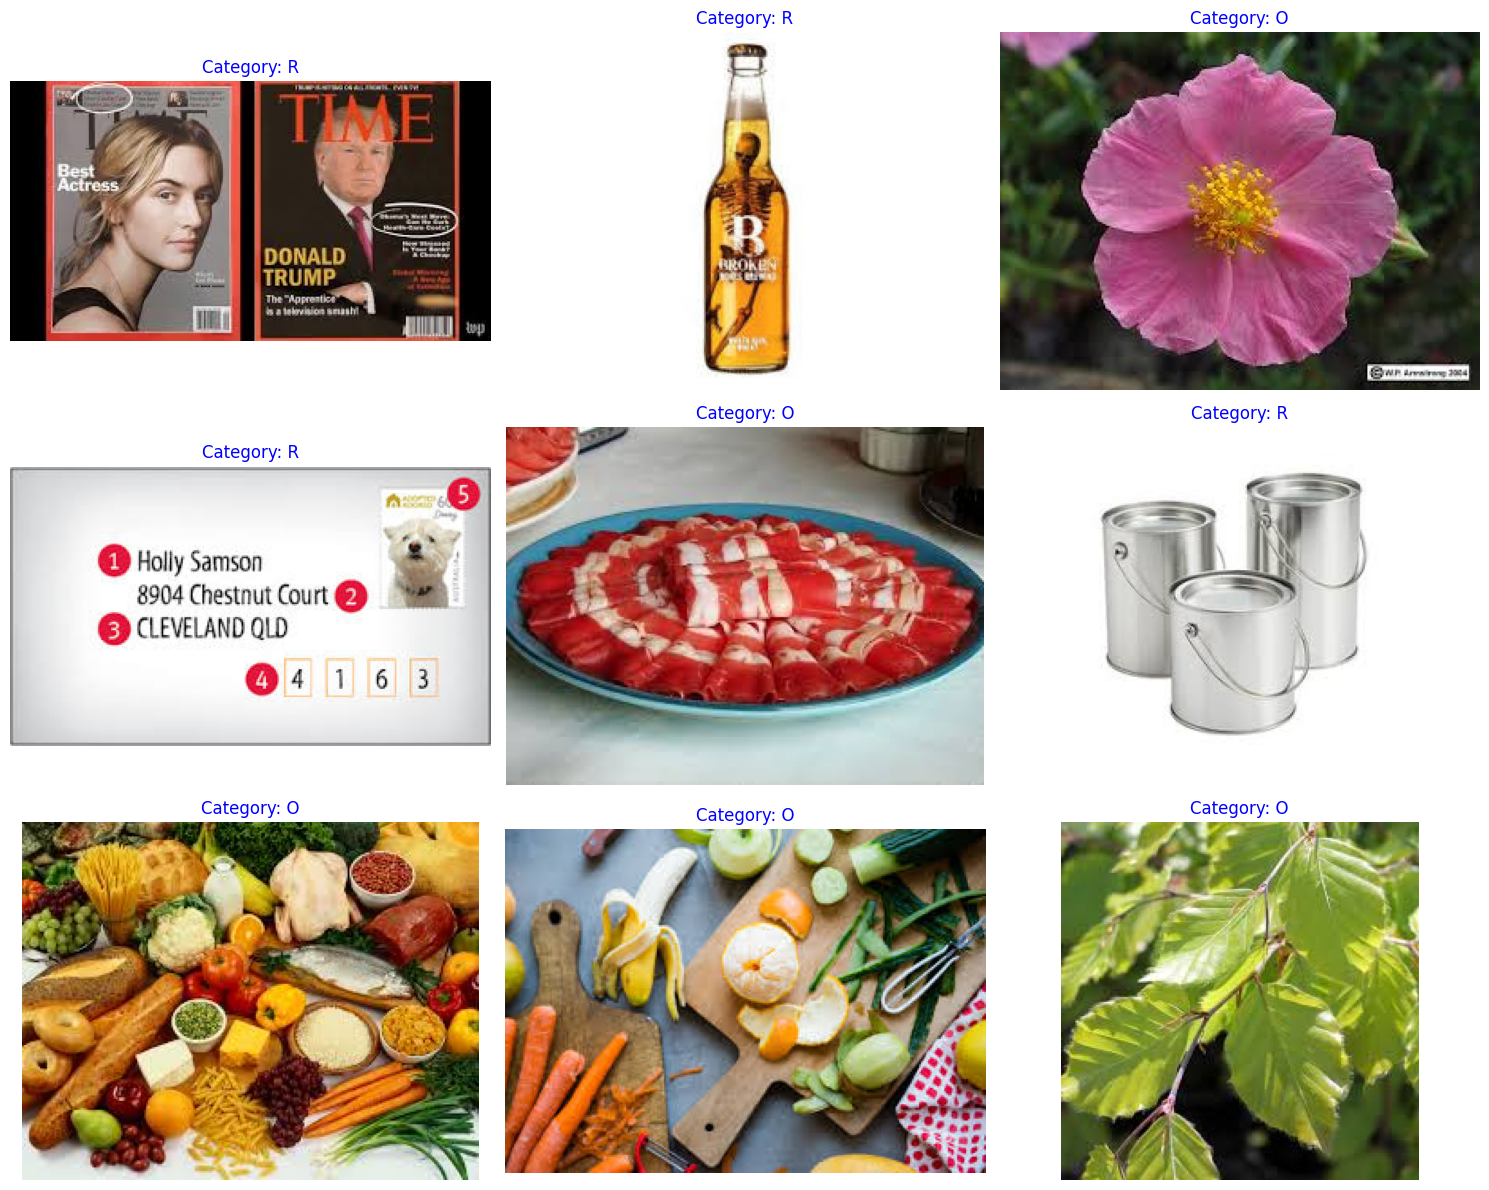

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))  

for i in range(9): 
    plt.subplot(3, 3, i+1)  
    index = np.random.randint(len(data))  
    plt.title(f"Category: {data.label[index]}", fontsize=12, color='blue')  
    plt.imshow(data.image[index])
    plt.axis("off")  
    plt.tight_layout()
plt.show()  


**#CNN**

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode="categorical"
)
test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"
hist = model.fit(
    train_generator,
    epochs=3,
    validation_data=train_generator
)

Epoch 1/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 869s 10s/step - accuracy: 0.7412 - loss: 0.5674 - val_accuracy: 0.8272 - val_loss: 0.3951
Epoch 2/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 939s 11s/step - accuracy: 0.8337 - loss: 0.4039 - val_accuracy: 0.8565 - val_loss: 0.3368
Epoch 3/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.8628 - loss: 0.3501 - val_accuracy: 0.8746 - val_loss: 0.2997
